# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()


,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [2]:
# данные склеились в одну строку. разделим их. 
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.loc[0, 'total_images']

20

In [4]:
# посмотрим общую информацию по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

У нас очень много данных и много пропусков. 23699 объевлений о продаже квартиры, по некоторым не известны высота потолков, жилая площадь и площадь кухни, а по некоторым неизвен даже город. 
Посмотрим на данные и попробуем востановить высотку потолков, неизвестные плодащи, наличие балкона, проанализируем параметры студио и апартаменты, посмотрим на города.

### Шаг 2. Предобработка данных

In [5]:
#посмотрим на уникальные значения балконов
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [6]:
#заменим nan на 0, так как если бы был балкон, пользователи заполнили бы этот параметр, и заменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [7]:
#посмотрим на floors_total
print(data['floors_total'].describe())

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [8]:
#очень большое стандартное отклонение, заменим пустые значения на медиану
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())


In [9]:
#разберемся в населенными пунтктами
#преведем все значения в нижний регистр

data['locality_name'] = data['locality_name'].str.lower()
print(data['locality_name'].value_counts())

санкт-петербург                       15721
посёлок мурино                          522
посёлок шушары                          440
всеволожск                              398
пушкин                                  369
                                      ...  
поселок коробицыно                        1
деревня новолисино                        1
коттеджный поселок кивеннапа север        1
деревня терпилицы                         1
поселок севастьяново                      1
Name: locality_name, Length: 364, dtype: int64


In [10]:
#первое, что бросается к глаза это е и ё. заменим е на ё.
def replace_e(locale):
    if locale == locale:
        if 'ё' in locale: 
            locale = locale.replace("ё", "е")
    return locale

data['locality_name'] = data['locality_name'].apply(replace_e)
data['locality_name'].value_counts()


санкт-петербург                       15721
поселок мурино                          556
поселок шушары                          440
всеволожск                              398
пушкин                                  369
                                      ...  
поселок тесово-4                          1
поселок калитино                          1
деревня терпилицы                         1
коттеджный поселок кивеннапа север        1
поселок севастьяново                      1
Name: locality_name, Length: 330, dtype: int64

In [11]:
#заменой ё на е мы избавились от 34 повторов
data_no_nan = data.loc[data['locality_name'].isna() == False]
loc = data_no_nan['locality_name'].unique()
print(loc)

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'

In [12]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

#лематизируем и посчитаем чаще встречающиеся значения
lemas = m.lemmatize(str(loc))
counter = (Counter(lemas))
print(counter)

Counter({' ': 424, "' '": 215, 'поселок': 167, "'\n": 114, " '": 114, 'деревня': 106, 'городской': 43, 'тип': 30, '-': 10, 'село': 10, 'станция': 8, 'большой': 7, 'бор': 6, 'старый': 6, 'новый': 5, 'товарищество': 5, 'красный': 4, 'садовый': 4, 'малый': 4, 'павлово': 3, 'ижора': 3, 'лесной': 3, 'коттеджный': 3, 'муриный': 2, 'коммунар': 2, 'федоровский': 2, 'ропша': 2, 'никольское': 2, 'сосновый': 2, 'романовка': 2, 'рощино': 2, 'луг': 2, 'советский': 2, 'лесогорский': 2, 'рахья': 2, 'колпана': 2, 'ладога': 2, 'зимитиц': 2, 'имя': 2, 'рябово': 2, 'бегуница': 2, 'поляна': 2, 'мга': 2, 'вещево': 2, 'приладожский': 2, 'щегловый': 2, 'рабитиц': 2, 'назия': 2, 'саперный': 2, 'гарболовый': 2, 'приветнинский': 2, 'усть': 2, 'любань': 2, 'русский': 2, 'горка': 2, 'при': 2, 'железнодорожный': 2, 'громовый': 2, 'тесовый': 2, 'нижний': 2, "['": 1, 'санкт-петербург': 1, 'шушары': 1, 'янино': 1, '1': 1, 'парголовый': 1, 'ломоносов': 1, 'сертолово': 1, 'петергоф': 1, 'пушкин': 1, 'кудровый': 1, 'кол

In [13]:
#посмотрим на значения, которые встречаются от 2 до 4 раз
new_counter = {}
for key, value in counter.items():
    if  1 < value < 5 : new_counter[key] = value
 
print(new_counter)

{'муриный': 2, 'коммунар': 2, 'красный': 4, 'федоровский': 2, 'садовый': 4, 'ропша': 2, 'никольское': 2, 'сосновый': 2, 'романовка': 2, 'рощино': 2, 'луг': 2, 'павлово': 3, 'советский': 2, 'ижора': 3, 'лесогорский': 2, 'рахья': 2, 'колпана': 2, 'ладога': 2, 'зимитиц': 2, 'имя': 2, 'рябово': 2, 'бегуница': 2, 'поляна': 2, 'мга': 2, 'малый': 4, 'вещево': 2, 'приладожский': 2, 'щегловый': 2, 'рабитиц': 2, 'назия': 2, 'саперный': 2, 'гарболовый': 2, 'приветнинский': 2, 'усть': 2, 'любань': 2, 'русский': 2, 'горка': 2, 'лесной': 3, 'при': 2, 'железнодорожный': 2, 'громовый': 2, 'тесовый': 2, 'коттеджный': 3, 'нижний': 2}


In [14]:
data_n = []
i = 0
for location in loc: 
    loc_m = m.lemmatize(location)
    for element in loc_m: 
        if element in new_counter:
            data_n.append([element, location])
            i += 1
            break
df_data_n = pd.DataFrame(data = data_n, columns = ['element', 'location'])
            
df_data_n = df_data_n.sort_values(by = 'element', ascending = True).reset_index(drop = True)

for i in range(df_data_n.shape[0]):
    print(df_data_n['element'][i], '\t', df_data_n['location'][i])
    

бегуница 	 деревня бегуницы
бегуница 	 деревня старые бегуницы
вещево 	 поселок станции вещево
гарболовый 	 деревня гарболово
гарболовый 	 поселок гарболово
горка 	 поселок городского типа дружная горка
громовый 	 поселок станции громово
громовый 	 поселок громово
зимитиц 	 поселок зимитицы
зимитиц 	 деревня зимитицы
ижора 	 поселок городского типа большая ижора
ижора 	 городской поселок большая ижора
имя 	 поселок городского типа имени морозова
имя 	 поселок городского типа имени свердлова
колпана 	 деревня большие колпаны
коммунар 	 поселок коммунары
коммунар 	 коммунар
коттеджный 	 коттеджный поселок счастье
коттеджный 	 коттеджный поселок кивеннапа север
коттеджный 	 коттеджный поселок лесное
красный 	 поселок городского типа красный бор
красный 	 красное село
красный 	 поселок красная долина
красный 	 поселок форт красная горка
ладога 	 новая ладога
ладога 	 село старая ладога
лесной 	 поселок лесное
лесной 	 садоводческое некоммерческое товарищество лесная поляна
лесогорский 	 го

In [15]:
#после анализа видим повторы. деревня щелкво и поселок щелково, поселок мурино и мурино - это один населенный пункт. 
#заменим деревня гарболово и поселок гарболово
data['locality_name'] = data['locality_name'].replace('деревня гарболово', 'поселок гарболово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа большая ижора', 'городской поселок большая ижора')
data['locality_name'] = data['locality_name'].replace('поселок городского типа лесогорский', 'городской поселок лесогорский')
data['locality_name'] = data['locality_name'].replace('любань', 'поселок любань')
data['locality_name'] = data['locality_name'].replace('поселок городского типа мга', 'городской поселок мга')
data['locality_name'] = data['locality_name'].replace('мурино', 'поселок мурино')
data['locality_name'] = data['locality_name'].replace('поселок городского типа назия', 'городской поселок назия')
data['locality_name'] = data['locality_name'].replace('никольское', 'село никольское')
data['locality_name'] = data['locality_name'].replace('поселок городского типа павлово', 'городской поселок павлово')
data['locality_name'] = data['locality_name'].replace('поселок станции приветнинское', 'поселок при железнодорожной станции приветнинское')
data['locality_name'] = data['locality_name'].replace('поселок городского типа рощино', 'городской поселок рощино')
data['locality_name'] = data['locality_name'].replace('поселок городского типа рябово', 'поселок рябово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа советский', 'городской поселок советский')
data['locality_name'] = data['locality_name'].replace('деревня щеглово', 'поселок щеглово')


In [16]:
#посмотрим на уникальные значения locality_name
print(data['locality_name'].value_counts())

санкт-петербург               15721
поселок мурино                  590
поселок шушары                  440
всеволожск                      398
пушкин                          369
                              ...  
деревня новолисино                1
садовое товарищество рахья        1
деревня вахнова кара              1
деревня меньково                  1
поселок севастьяново              1
Name: locality_name, Length: 316, dtype: int64


In [17]:
#c 364 уникальных населенных пунктов мы пришли к 316, у нас 49 пропустов. 
# удалим это 49 строк, так как нет информации, по которой можно было бы востановить данные 

#data.dropna(subset = ['locality_name'], inplace = True)


In [18]:
# теперь посмотрим на параметры total_area, living_area, kitchen_area. 
# для начала посмотрим, количество, среднюю и медиану на этих параметров в зависимости от студио или нет
data.pivot_table(index = 'studio', values = ['total_area', 'living_area', 'kitchen_area'], aggfunc =({'count', 'mean','median'}))


kitchen_area                   living_area                    \
              count       mean median       count       mean median   
studio                                                                
False         21421  10.569807    9.1       21657  34.557094   30.0   
True              0        NaN    NaN         139  18.995396   18.0   

       total_area                    
            count       mean median  
studio                               
False       23550  60.554692   52.0  
True          149  27.783154   26.0

In [19]:
# посмотрим сколько комнат в студио
data.pivot_table(index = 'rooms', values = 'studio', aggfunc = 'sum')

,studio
rooms,
0,138.0
1,11.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


In [20]:
# у нас 11 квартар типа студио с 1 контаной. Поменяем на 0 комнат, так это студио, и там 0 комнат. 
data.loc[(data['studio'] == 1) & (data['rooms'] == 1), 'rooms'] = 0

In [21]:
# проверим себя
data.pivot_table(index = 'rooms', values = 'studio', aggfunc = 'sum')

,studio
rooms,
0,149.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


In [22]:
# посмотрим, есть ли квартиры с 0 комнат и не студио
data[(data['studio'] == False) & (data['rooms'] == 0)].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,59.000000,5.900000e+01,59.000000,59.0,10.00000,59.000000,55.000000,59.000000,0.0,59.000000,31.000000,31.000000,31.000000,9.000000,31.000000,21.000000,59.000000
mean,7.423729,3.911034e+06,32.707288,0.0,5.26200,17.559322,18.585455,9.610169,NaN,1.237288,25054.354839,13577.870968,0.387097,665.111111,0.935484,517.619048,77.474576
std,5.531114,8.910509e+06,44.986261,0.0,7.64236,6.891452,3.464552,6.843111,NaN,0.857804,13276.323677,5014.710166,0.667204,242.505899,0.892020,283.847754,103.924103
min,0.000000,1.315000e+06,16.000000,0.0,2.70000,4.000000,10.500000,1.000000,NaN,0.000000,10031.000000,2111.000000,0.000000,228.000000,0.000000,72.000000,3.000000
25%,3.500000,2.310000e+06,25.000000,0.0,2.71250,12.000000,17.000000,4.000000,NaN,0.000000,15606.000000,11904.500000,0.000000,518.000000,0.000000,232.000000,18.500000
50%,7.000000,2.600000e+06,26.100000,0.0,2.80000,18.000000,18.000000,8.000000,NaN,2.000000,20735.000000,13222.000000,0.000000,733.000000,1.000000,584.000000,45.000000
75%,10.000000,3.277500e+06,28.250000,0.0,2.80000,24.000000,20.000000,13.500000,NaN,2.000000,32726.000000,16814.000000,1.000000,761.000000,1.000000,767.000000,81.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.00000,35.000000,25.700000,26.000000,NaN,2.000000,53791.000000,23810.000000,2.000000,1021.000000,3.000000,936.000000,483.000000


In [23]:
# у нас 59 квартир с 0 комнат, но при этом не студио. одна странная квартира в 371 квм. 
# заменим их на студио. 
data[(data['studio'] == False) & (data['rooms'] == 0)].sort_values(by = 'total_area', ascending = False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,False,True,NaN,0,санкт-петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,NaN,16.0,25.7,2,NaN,False,True,NaN,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4683,2,3650000.0,35.00,2018-02-01T00:00:00,0,NaN,25.0,23.4,25,NaN,False,True,NaN,0,санкт-петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1,поселок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1,поселок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
21628,9,3900000.0,34.00,2017-03-18T00:00:00,0,NaN,20.0,24.0,10,NaN,False,True,NaN,2,санкт-петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
7008,4,5200000.0,32.30,2017-09-14T00:00:00,0,NaN,11.0,25.5,4,NaN,False,True,NaN,0,санкт-петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,86.0
17805,17,2600000.0,31.10,2017-10-25T00:00:00,0,NaN,16.0,21.4,14,NaN,False,True,NaN,2,санкт-петербург,19212.0,22637.0,0.0,NaN,1.0,457.0,44.0
6805,7,1850000.0,31.00,2017-11-10T00:00:00,0,NaN,18.0,18.0,10,NaN,False,True,NaN,1,село никольское,NaN,NaN,NaN,NaN,NaN,NaN,7.0
19735,1,2800000.0,30.50,2017-10-10T00:00:00,0,2.75,25.0,20.0,2,NaN,False,True,NaN,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [24]:
# заменим их на студио.
data.loc[(data['studio'] == False) & (data['rooms'] == 0), 'studio'] = 1

In [25]:
# для квартир типа студио сделаем замену пустых значений для параметра living_area, 
# kitchen_area оставим nan, так как она нигде не заполнена

data[data['studio'] == True].describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,208.000000,2.080000e+02,208.000000,208.0,87.000000,208.000000,194.000000,208.000000,0.0,208.000000,123.000000,123.000000,123.000000,30.000000,123.000000,72.000000,194.000000
mean,7.668269,3.308801e+06,29.179904,0.0,3.083333,16.745296,18.879175,8.572115,NaN,1.024038,24955.276423,13402.081301,0.300813,585.966667,0.821138,524.708333,107.211340
std,5.048609,4.915092e+06,25.178794,0.0,2.620996,6.857616,6.478729,6.151438,NaN,0.924387,12692.587963,5018.318191,0.571667,301.515881,0.868695,269.247958,156.114385
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000e+06,24.037500,0.0,2.700000,11.750000,16.000000,3.750000,NaN,0.000000,14625.000000,11618.000000,0.000000,386.250000,0.000000,350.250000,28.000000
50%,7.000000,2.700000e+06,26.075000,0.0,2.750000,17.000000,18.000000,7.000000,NaN,1.000000,21460.000000,13615.000000,0.000000,532.000000,1.000000,527.500000,45.000000
75%,11.000000,3.385000e+06,28.600000,0.0,2.800000,23.000000,20.000000,13.000000,NaN,2.000000,34240.000000,16353.500000,0.000000,759.750000,1.000000,665.750000,115.000000
max,21.000000,7.100000e+07,371.000000,0.0,27.000000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


In [26]:
# заменим на медиану. 
data.loc[(data['studio'] == True) & (data['living_area'].isna() == True), 'living_area'] = data[data['studio'] == True]['living_area'].mean()

In [27]:
#теперь посмотрим на средние значения не для студио
data[data['studio'] == False].pivot_table(index = 'rooms', values = ['living_area', 'kitchen_area', 'total_area'], aggfunc = ({'max', 'min','mean', 'median', 'count'}))

kitchen_area                                   living_area         \
             count    max        mean  median    min       count    max   
rooms                                                                     
1             7213   58.4    9.550118    9.04    1.3        7377   60.0   
2             7286   93.0    9.979584    8.80    2.0        7296   99.5   
3             5380  107.0   11.308580    9.50    4.0        5366  170.8   
4             1081   77.0   13.664033   11.10    4.8        1089  250.0   
5              285   66.0   18.367649   15.10    5.0         292  301.5   
6               97   56.0   21.048763   19.50    5.9          99  300.0   
7               52   70.0   21.998077   20.00    5.0          53  347.5   
8                9   45.0   24.866667   25.00    5.0          12  260.0   
9                7   50.0   25.071429   14.30   11.7           7  250.0   
10               3   30.0   22.866667   19.80   18.8           3  189.4   
11               2   13.3   12.600000   12.60   11.9           2  138.8   
12               1  112.0  112.000000  112.00  112.0           1  409.7   
14               2   25.9   21.250000   21.25   16.6           2  222.0   
15               1  100.0  100.000000  100.00  100.0           1  409.0   
16               1   13.0   13.000000   13.00   13.0           1  180.0   
19               1   27.6   27.600000   27.60   27.6           1  264.5   

                                  total_area                                    
             mean   median    min      count    max        mean  median    min  
rooms                                                                           
1       17.891736   17.600    3.0       8036  494.1   37.658703   36.60   12.0  
2       31.736849   30.500    2.0       7940  196.0   55.855089   53.00   20.0  
3       47.387941   45.000    3.0       5814  363.1   77.764580   73.00   40.1  
4       66.983223   63.600    5.4       1180  500.0  107.610763   99.30   42.0  
5      100.009247   91.785   23.6        326  507.0  161.474816  146.45   40.0  
6      130.983636  123.900   51.0        105  500.0  201.537619  184.30   87.0  
7      163.564151  145.000   57.4         59  631.2  265.325424  214.00  100.6  
8      168.683333  161.000  107.0         12  373.1  259.233333  235.70  150.0  
9      190.257143  179.200  157.0          8  400.0  305.975000  300.95  235.0  
10     165.566667  161.400  145.9          3  290.0  259.566667  272.60  216.1  
11     133.900000  133.900  129.0          2  194.1  188.900000  188.90  183.7  
12     409.700000  409.700  409.7          1  900.0  900.000000  900.00  900.0  
14     195.150000  195.150  168.3          2  363.0  304.200000  304.20  245.4  
15     409.000000  409.000  409.0          1  590.0  590.000000  590.00  590.0  
16     180.000000  180.000  180.0          1  270.0  270.000000  270.00  270.0  
19     264.500000  264.500  264.5          1  374.6  374.600000  374.60  374.6

In [28]:
# добавим столцы соотношения жилой площади и площади кухни к общей 
data['kitchen_area_per'] = data['kitchen_area'] / data['total_area']
data['living_area_per'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_per,living_area_per
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.231481,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000


In [29]:
# теперь посмотрим на средние значения для % тех же параметров
data[data['studio'] == False].pivot_table(index = 'rooms', values = ['living_area_per', 'kitchen_area_per', 'total_area'], aggfunc = ({'max', 'min','mean', 'median', 'count'}))

kitchen_area_per                                          \
                 count       max      mean    median       min   
rooms                                                            
1                 7213  0.787879  0.249906  0.247839  0.045614   
2                 7286  0.657051  0.174163  0.161075  0.043524   
3                 5380  0.715232  0.140928  0.128571  0.042810   
4                 1081  0.500000  0.124031  0.112245  0.047059   
5                  285  0.347594  0.113455  0.105386  0.029240   
6                   97  0.177215  0.104150  0.099502  0.051948   
7                   52  0.261190  0.091932  0.083717  0.025381   
8                    9  0.129683  0.091708  0.109170  0.026151   
9                    7  0.125000  0.075054  0.049620  0.042173   
10                   3  0.103448  0.088013  0.091624  0.068966   
11                   2  0.072401  0.066855  0.066855  0.061309   
12                   1  0.124444  0.124444  0.124444  0.124444   
14                   2  0.105542  0.075636  0.075636  0.045730   
15                   1  0.169492  0.169492  0.169492  0.169492   
16                   1  0.048148  0.048148  0.048148  0.048148   
19                   1  0.073679  0.073679  0.073679  0.073679   

      living_area_per                                         total_area  \
                count       max      mean    median       min      count   
rooms                                                                      
1                7377  0.975754  0.485686  0.482353  0.073171       8036   
2                7296  0.956522  0.579287  0.585009  0.038462       7940   
3                5366  0.972222  0.625302  0.631667  0.021583       5814   
4                1089  0.908439  0.646489  0.659740  0.069588       1180   
5                 292  0.885852  0.641377  0.651842  0.201194        326   
6                  99  0.983447  0.668819  0.679412  0.425306        105   
7                  53  0.792011  0.657981  0.681670  0.179444         59   
8                  12  0.956522  0.667001  0.688475  0.460432         12   
9                   7  0.773101  0.612299  0.628251  0.402261          8   
10                  3  0.746876  0.645065  0.653103  0.535216          3   
11                  2  0.755580  0.710093  0.710093  0.664606          2   
12                  1  0.455222  0.455222  0.455222  0.455222          1   
14                  2  0.685819  0.648695  0.648695  0.611570          2   
15                  1  0.693220  0.693220  0.693220  0.693220          1   
16                  1  0.666667  0.666667  0.666667  0.666667          1   
19                  1  0.706086  0.706086  0.706086  0.706086          1   

                                         
         max        mean  median    min  
rooms                                    
1      494.1   37.658703   36.60   12.0  
2      196.0   55.855089   53.00   20.0  
3      363.1   77.764580   73.00   40.1  
4      500.0  107.610763   99.30   42.0  
5      507.0  161.474816  146.45   40.0  
6      500.0  201.537619  184.30   87.0  
7      631.2  265.325424  214.00  100.6  
8      373.1  259.233333  235.70  150.0  
9      400.0  305.975000  300.95  235.0  
10     290.0  259.566667  272.60  216.1  
11     194.1  188.900000  188.90  183.7  
12     900.0  900.000000  900.00  900.0  
14     363.0  304.200000  304.20  245.4  
15     590.0  590.000000  590.00  590.0  
16     270.0  270.000000  270.00  270.0  
19     374.6  374.600000  374.60  374.6

In [30]:
# посмотрим для каких квартир в данных пустые значения для жилой площади
data[data['living_area'].isna() == True].groupby(by = 'rooms')['total_area'].count()

rooms
1    659
2    644
3    448
4     91
5     34
6      6
7      6
9      1
Name: total_area, dtype: int64

In [31]:
# посмотрим для каких квартир в данных пустые значения для площади кухни
data[data['kitchen_area'].isna() == True].groupby(by = 'rooms')['total_area'].count()

rooms
0    208
1    823
2    654
3    434
4     99
5     41
6      8
7      7
8      3
9      1
Name: total_area, dtype: int64

In [32]:
# укрупним группы: создадим 5 и более комнат. 

def rooms_group(rooms):
    if rooms >= 5: return '5 и более'
    else: return rooms 

data['rooms_group'] = data['rooms'].apply(rooms_group)

#data.loc[(data['kitchen_area'].isna() == True) & (data['rooms'] == 1), 'kitchen_area'] = data[data['rooms_group'] == 1]['kitchen_area_per'].median() * data[(data['kitchen_area'].isna() == True) & (data['rooms'] == 1)]['total_area']  
#data.loc[(data['kitchen_area'].isna() == True) & (data['rooms'] == 2), 'kitchen_area'] = data[data['rooms_group'] == 2]['kitchen_area_per'].median() * data[(data['kitchen_area'].isna() == True) & (data['rooms'] == 2)]['total_area']  
#data.loc[(data['kitchen_area'].isna() == True) & (data['rooms'] == 3), 'kitchen_area'] = data[data['rooms_group'] == 3]['kitchen_area_per'].median() * data[(data['kitchen_area'].isna() == True) & (data['rooms'] == 3)]['total_area']  
#data.loc[(data['kitchen_area'].isna() == True) & (data['rooms'] == 4), 'kitchen_area'] = data[data['rooms_group'] == 4]['kitchen_area_per'].median() * data[(data['kitchen_area'].isna() == True) & (data['rooms'] == 4)]['total_area']  
#data.loc[(data['kitchen_area'].isna() == True) & (data['rooms'] >= 5), 'kitchen_area'] = data[data['rooms_group'] == '5 и более']['kitchen_area_per'].median() * data[(data['kitchen_area'].isna() == True) & (data['rooms'] >= 5)]['total_area']  

#data.loc[(data['living_area'].isna() == True) & (data['rooms'] == 1), 'living_area'] = data[data['rooms_group'] == 1]['living_area'].median() * data[(data['living_area'].isna() == True) & (data['rooms'] == 1)]['total_area']  
#data.loc[(data['living_area'].isna() == True) & (data['rooms'] == 2), 'living_area'] = data[data['rooms_group'] == 2]['living_area'].median() * data[(data['living_area'].isna() == True) & (data['rooms'] == 2)]['total_area']  
#data.loc[(data['living_area'].isna() == True) & (data['rooms'] == 3), 'living_area'] = data[data['rooms_group'] == 3]['living_area'].median() * data[(data['living_area'].isna() == True) & (data['rooms'] == 3)]['total_area']  
#data.loc[(data['living_area'].isna() == True) & (data['rooms'] == 4), 'living_area'] = data[data['rooms_group'] == 4]['living_area'].median() * data[(data['living_area'].isna() == True) & (data['rooms'] == 4)]['total_area']  
#data.loc[(data['living_area'].isna() == True) & (data['rooms'] >= 5), 'living_area'] = data[data['rooms_group'] == '5 и более']['living_area'].mean() * data[(data['living_area'].isna() == True) & (data['rooms'] >= 5)]['total_area']  

# расчитаем соотношение плодащей кухни/жилой комнаты к общей площади квартиры
# расчет по средневзвешанной по квартирам, где известны все значения.
data_area = data.loc[(data['living_area'].isna() == False) & (data['kitchen_area'].isna() == False)].groupby('rooms_group')['total_area', 'kitchen_area', 'living_area'].sum()
data_area['living_per'] = data_area['living_area'] / data_area['total_area']
data_area['kitchen_per'] = data_area['kitchen_area'] / data_area['total_area']

# расчет по медиане из соотношения для каждой кватиры
data['kitchen_area_per'] = data['kitchen_area'] / data['total_area']
data['living_area_per'] = data['living_area'] / data['total_area']
data_area_new = data.groupby('rooms_group')['living_area_per', 'kitchen_area_per'].median()

print(data_area)
print(data_area_new)

# для себя оценим среднее до изменений
data.groupby('rooms_group')['living_area', 'kitchen_area'].mean()

             total_area  kitchen_area    living_area  living_per  kitchen_per
rooms_group                                                                  
1             267003.30      67350.63  126521.050000    0.473856     0.252246
2             396748.40      70630.31  225766.571508    0.569042     0.178023
3             407915.15      59303.58  249605.560004    0.611906     0.145382
4             113227.32      14398.91   70963.519999    0.626735     0.127168
5 и более      85509.36       8984.00   54051.679994    0.632114     0.105065
             living_area_per  kitchen_area_per
rooms_group                                   
0                   0.689655               NaN
1                   0.482353          0.247839
2                   0.585009          0.161075
3                   0.631667          0.128571
4                   0.659740          0.112245
5 и более           0.661483          0.101765


,living_area,kitchen_area
rooms_group,,
0,18.879175,NaN
1,17.891736,9.550118
2,31.736849,9.979584
3,47.387941,11.308580
4,66.983223,13.664033
5 и более,119.436667,19.975293


In [33]:
# возьмем медианные значения. сильно разнится средневзевашенное и медианой из-за пустых значений.
# заполним пустые значения как произведение соотношения плодащи кухни/жилой на общую площадь.

def fill_kitchen(row):
    rooms = row['rooms_group']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (kitchen_area != kitchen_area) and (rooms != 0): 
        return data_area_new.loc[rooms, 'kitchen_area_per'] * total_area
    else: return kitchen_area
    
def fill_living(row):
    rooms = row['rooms_group']
    living_area = row['living_area']
    total_area = row['total_area']
    if (living_area != living_area) and (rooms != 0): 
        return data_area_new.loc[rooms, 'living_area_per'] * total_area
    else: return living_area
    
data['kitchen_area'] = data.apply(fill_kitchen, axis = 1) 
data['living_area'] = data.apply(fill_living, axis = 1)

# проверим как изменаль среднее
data.groupby('rooms_group')['living_area', 'kitchen_area'].mean()    

,living_area,kitchen_area
rooms_group,,
0,18.879175,NaN
1,17.987565,9.492975
2,31.867136,9.900482
3,47.721526,11.218445
4,67.862891,13.568080
5 и более,120.787196,19.860531


In [34]:
# теперь изучим парметр "высота потолка". вероятней всего это зависит от типа дома. 
# посмотрим корреляцию этого параметра для заполенных значений

data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [35]:
# что за потолки в 100 метров. я тоже хочу так жить) 
data.sort_values(by = 'ceiling_height', ascending = False).head(50)
                                                        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_per,living_area_per,rooms_group
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.000000,5,True,False,False,11.000000,5,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,0.440000,0.560000,1
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.500000,5,False,False,False,16.500000,4,санкт-петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN,0.178571,0.600649,2
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.000000,2,NaN,False,False,8.000000,0,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106667,0.706667,3
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.50,24.0,37.700000,19,False,False,False,11.000000,2,санкт-петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0,0.261905,0.897619,1
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.00,4.0,22.000000,2,NaN,False,False,10.000000,1,санкт-петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0,0.222222,0.488889,1
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.000000,3,NaN,False,False,9.000000,2,деревня мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,0.166667,0.555556,2
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.000000,13,NaN,False,False,12.000000,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,0.150000,0.512500,2
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.00,10.0,30.100000,3,False,False,False,8.100000,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0,0.139655,0.518966,2
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.00,5.0,33.000000,4,False,False,False,7.200000,0,санкт-петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0,NaN,0.589286,3
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.00,2.0,73.000000,2,True,False,False,9.000000,1,деревня нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0,0.091837,0.744898,4


In [36]:
# заменим пустые значения медианой. 
# даже если предположить, что для потолков в 27-32 метра, люди забыли поставить точку. 5 метров - еще реально, 
#а вот 8 и 100 метров - совсем не понятно. может быть люди перепутали с другим параметром или не правильно загрузись данные. 

ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)


In [37]:
# теперь посмотрим на парамерт is_apartment
print('Всего квартир с незаполненной характеристикой is_apartment:', data['is_apartment'].isnull().count())
data.groupby('is_apartment')['total_area'].count()


Всего квартир с незаполненной характеристикой is_apartment: 23699


is_apartment
False    2725
True       50
Name: total_area, dtype: int64

In [38]:
# только 50 квартир являются апартемантами. Характеристика апартаменты может быть как для студио, так и для квартиры. 
# это характиристика типа дома. поэтому не будем трогать данный параметр, так как нет соответвующих данных 
#для востановления значений

In [39]:
# посмотрим на параментy cityCenters_nearest
print('Количество квартир, по который не известна удаленность от цетра:', data['cityCenters_nearest'].isna().sum())

Количество квартир, по который не известна удаленность от цетра: 5519


In [40]:
# посмотрим на параментy cityCenters_nearest
# некоторые данные можно востановить по названию населенного пунтка, кроме СПБ
locality_empty = data.loc[data['cityCenters_nearest'].isnull() == True].pivot_table(index = 'locality_name', values = 'total_area', aggfunc = 'count')
locality = data.loc[data['cityCenters_nearest'].isnull() == False].pivot_table(index = 'locality_name', values = 'cityCenters_nearest', aggfunc = ({'mean', 'median','count'}))
print ('Количество городов, по которым не известна удаленность от центра:', locality_empty.shape[0])
print('Количество городов, по которым известна удаленность от центра:', locality.shape[0])


Количество городов, по которым не известна удаленность от центра: 298
Количество городов, по которым известна удаленность от центра: 27


In [41]:
# только по 27 известна удаленность от центра. Не густо. 
# посмотрим на медиану и среднюю для тех, по которым известна

locality = locality.merge(locality_empty, on = 'locality_name')
locality


,count,mean,median,total_area
locality_name,,,,
колпино,337,32113.771513,32018.0,1
красное село,176,30020.284091,29140.5,2
кронштадт,95,49195.726316,49575.0,1
ломоносов,132,50739.969697,51677.0,1
поселок мурино,2,21888.000000,21888.0,588
поселок шушары,436,24243.387615,24212.0,4
поселок щеглово,1,34085.000000,34085.0,23
пушкин,368,28745.375000,27930.5,1
санкт-петербург,15660,11601.291571,12244.5,61


In [42]:
# не густо. но погрешность небольшая - 1 км. поэтому может заполнить и для СПБ. 
# заполним пропуски медаиной 

def fill_cityCenters_nearest(row):
    distance = row['cityCenters_nearest']
    city = row['locality_name']
    if distance != distance:
        if city in locality.index.tolist(): 
            return locality.loc[city]['median']  
    else: return distance
  
data['cityCenters_nearest'] = data.apply(fill_cityCenters_nearest, axis = 1)

In [43]:
print('Количество квартир, по который не известна удаленность от цетра, после замены:', data['cityCenters_nearest'].isna().sum())

Количество квартир, по который не известна удаленность от цетра, после замены: 4837


In [44]:
# пересчитаем % для площадей
#data['kitchen_area_per'] = data['kitchen_area'] / data['total_area']
#data['living_area_per'] = data['living_area'] / data['total_area']

# убрала, так как считала выше

In [45]:
# изменим тип данных для first_day_exposition во временной
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [46]:
# изменим тип данных для floors_total на int
data['floors_total'] = data['floors_total'].astype('int')

In [47]:
#изменим тип данных для studio на bool
data['studio'] = data['studio'].astype('bool')

In [48]:
#проверим себя
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23491 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18862 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

In [49]:
# проверим на наличие дубликатов
data.duplicated().sum()

0

### Вывод

- заменили пустые значения для параментра балконы на 0. Если балкона нет, то вероятней всего этот параметр не заполнят. 
- заменили пустые значения для этажности дома на медиану и поменяли тип данных на int.
- проанализировали названия городов, заменили е на ё, объединили "поселки городского типа" и удалили квартиры с неизвестным значением. Таких всего лишь 49. 
- проанализировали параметр студио. Для всех студио заменили кол-во комнат на 0, для всех квартир с 0 комнатами - заменили на студио. для квартир типа студио заменили медианой пустые значения для жилой площади, для кухни оставили без изменений, так как это студио и ни одной такой квартиры не заполнен этот параметр. Поменяли тип данных для параметра студио на bool.
- проанализировали параметры жилая площадь и плодащь кухни для квартир типа не-студио. больше всего квартир, по которым не известен один из параметр, - это квартиры с 1 -4 комнатами, поэтому создали группу 5 и более квартир, и заполнили неизвестные значения как соотношение плодащи неизвестного на общую плодащь и умноженное на площадь самой квартиры. 
- проанализировали параметр высота потолка. в целом в любом нормальной квартире или доме высота потолка не должна превышать более 3х метров, у нас же есть значения и 100, и 20-37 и 4-14. Если 4 еще может быть, а в 20-37 - забыли поставить точку, то 8 и 100 метров - совсем не понятно. Поэтому пропуски заменили медианой. 
- параметр апартаменты трогать не стали. апартаменты влияют на стоимость коммунальных услгу и обслуживания дома. это достаточно важный параметр и является характеристикой дома. Был бы дом, можно было попробовать востановить данные, но в данном случае мы оставили его неизменным. 
- неизвестные значения для параметра удаленность от цетра заполнили медианой по тем городам, где известен этот параметр.
- дату публикации объявление перевели во временной тип данных. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [50]:
# добавим в таблицу стоимость за 1 квм
data['per_m'] = data['last_price'] / data ['total_area']

# добавим в таблицу этажность: первый, последний, другой

def floor(data):
    floor = data['floor']
    total_floors = data['floors_total']
    if floor == 1: return 'первый'
    elif floor == total_floors: return 'последний'
    else: return 'другой'
    
def floor_index(data):
    floor = data['floor']
    total_floors = data['floors_total']
    if floor == 1: return 1
    elif floor == total_floors: return 3
    else: return 2
    
data['floor_type'] = data.apply(floor, axis = 1)
data['floor_index'] = data.apply(floor_index, axis = 1)

In [51]:
# добавим день недели, месяц и год публикации объявления

data['first_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['first_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_wd'] = data['first_day_exposition'].dt.weekday

# проверим себя

data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_per,living_area_per,rooms_group,per_m,floor_type,floor_index,first_year,first_month,first_wd
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,NaN,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.231481,0.472222,3,120370.370370,другой,2,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,NaN,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396,1,82920.792079,первый,1,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,NaN,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500,2,92785.714286,другой,2,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.435,9,NaN,False,False,20.442857,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,3,408176.100629,другой,2,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000,2,100000.000000,другой,2,2018,6,1


### Вывод

Добавили в таблицы следующие характеристики: стоимость за квм, этажность, день, месяц и год публикации объявления

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [52]:
# изучим параметр площадь 
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

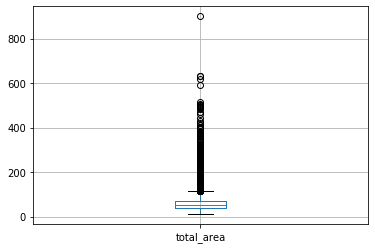

In [53]:
data.boxplot('total_area')

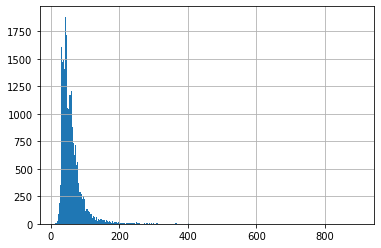

In [54]:
data['total_area'].hist(bins = 300, range = (12, 900))


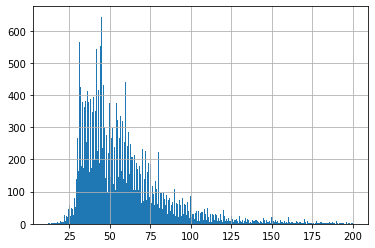

In [55]:
#посмотрим детальней 
data['total_area'].hist(bins = 300, range = (12, 200))

In [56]:
data.query('total_area > 200')['total_area'].describe()

count    227.000000
mean     284.609648
std       95.844475
min      200.300000
25%      222.300000
50%      250.000000
75%      309.850000
max      900.000000
Name: total_area, dtype: float64

In [57]:
print("Количество квартир с площадью более 200 квм:", data.query('total_area > 200')['rooms'].count())
print("Доля квартир с площадью более 200 квм: {:.2%}".format(data.query('total_area > 200')['rooms'].count()/data.shape[0]))

Количество квартир с площадью более 200 квм: 227
Доля квартир с площадью более 200 квм: 0.96%


Площадь 75% всех квартир не превышает 70 квм. Медиана - 52, а среднее значение - 60. Выбросами можно считать значения более 114 квм (70-40)* 1.5 + 70 = 114 по диаграме размаха или по 35* 3+60=165, если принимать расперделение нормальным. Квартир с площадью более 115 квм - 1217 или 5%, 165 квм - 419 или 1,77%, 200 квм - 227 или 0,96%. 

In [58]:
#изучим параметр число комнат
data['rooms'].describe()

count    23699.000000
mean         2.070172
std          1.079081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

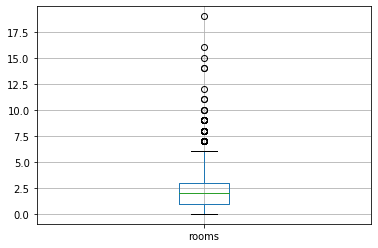

In [59]:
data.boxplot('rooms')

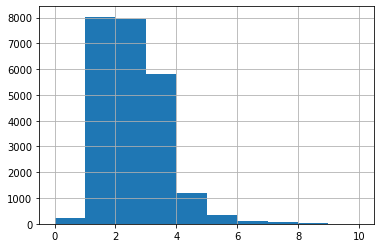

In [60]:
data['rooms'].hist(range = (0, 10))

In [61]:
data.groupby('rooms')['total_area'].agg({'count', 'mean'})

,count,mean
rooms,,
0,208,29.179904
1,8036,37.658703
2,7940,55.855089
3,5814,77.764580
4,1180,107.610763
5,326,161.474816
6,105,201.537619
7,59,265.325424
8,12,259.233333


In [62]:
print("Количество квартир с 8 и более контами:", data.query('rooms >= 8')['rooms'].count())
print("Доля квартир с 8 и более контами: {:.2%}".format(data.query('rooms >= 8')['rooms'].count()/data.shape[0]))

Количество квартир с 8 и более контами: 31
Доля квартир с 8 и более контами: 0.13%


75% квартир - это квартиры с максимально 3 комнатами. Количество 1 и 2 комнатных квартир примерно одинаково - по 8к. 3х уже меньше. По диаграме размаха выбросами можно считать квартиры с 6 и более комнатами. По количеству значений - это 8 и более комнат. Всего квартир с 8 и более комнатами - 31 или 0.13%

In [63]:
# изучим параметр цена продажи
data['last_price_mln'] = data['last_price']/1000000
data['last_price_mln'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

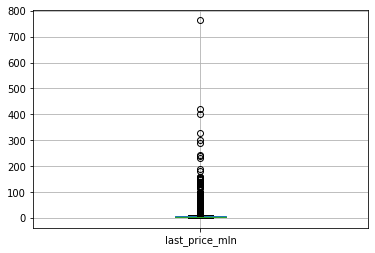

In [64]:
data.boxplot('last_price_mln')

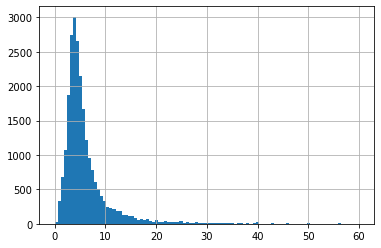

In [65]:
data['last_price_mln'].hist(bins = 100, range = (0, 60))

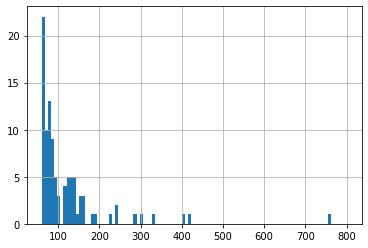

In [66]:
data['last_price_mln'].hist(bins = 100, range = (61, 800))

Стоимость 75% не превышает 6,8 млн, медиана 4,6 млн, среднее 6,5, а стандарное отклонение очень большое - практически 11 млн. Судя по диаграмме размаха, в данных очень много выбрасов. Посмотрим на хвост  со стоимостью более 36 млн (6,5 + 3* 11 = 39.5).

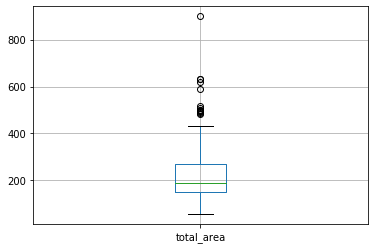

In [67]:
# посмотрим на площадь квартир, стоимостью более 36 млн. 
data.query('last_price_mln > 36').boxplot('total_area')

In [68]:
data.query('last_price_mln > 36')['total_area'].describe()

count    236.000000
mean     226.324703
std      117.806692
min       55.300000
25%      149.325000
50%      187.800000
75%      269.662500
max      900.000000
Name: total_area, dtype: float64

Больше 36 млн может стоить как квратира в 55 кв. метра, так и в 900 кв. метра. 

In [69]:
# изучим параметр стоимость за 1квм.
data['per_m_th'] = data['per_m']/1000
data['per_m_th'].describe()

count    23699.000000
mean        99.421656
std         50.306802
min          0.111835
25%         76.585470
50%         95.000000
75%        114.256326
max       1907.500000
Name: per_m_th, dtype: float64

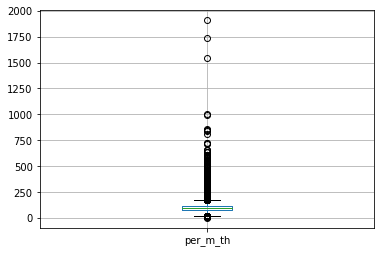

In [70]:
data.boxplot('per_m_th')

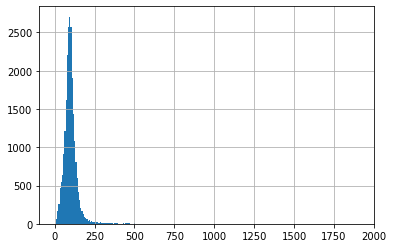

In [71]:
data['per_m_th'].hist(bins = 250)

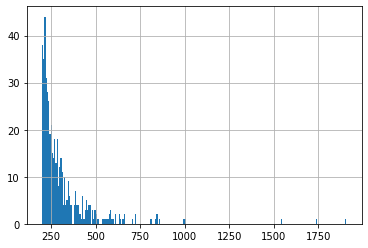

In [72]:
data.query('per_m_th > 200')['per_m_th'].hist(bins = 250)

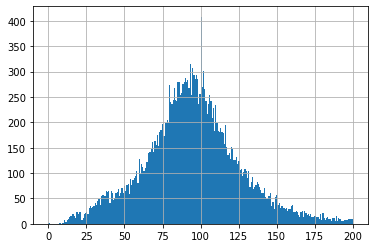

In [73]:
data.query('per_m_th < 200')['per_m_th'].hist(bins = 250)

In [74]:
data.query('per_m_th > 250')['per_m_th'].describe()

count     275.000000
mean      385.944872
std       195.089854
min       251.098901
25%       280.956113
50%       321.739130
75%       427.810285
max      1907.500000
Name: per_m_th, dtype: float64

In [75]:
print("Количество квартир c ценой более 250т за квм:", data.query('per_m_th > 250')['rooms'].count())
print("Доля квартир c ценой более 250т за квм: {:.2%}".format(data.query('per_m_th > 250')['rooms'].count()/data.shape[0]))

Количество квартир c ценой более 250т за квм: 275
Доля квартир c ценой более 250т за квм: 1.16%


Средняя стоимость квартиры и медиана примерно одинаковы и составляют 99 и 95 т. за 1 квм. 
Удалим хвост 250 т за кв. метр и более (275 объевлений и 1.16%).

In [76]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

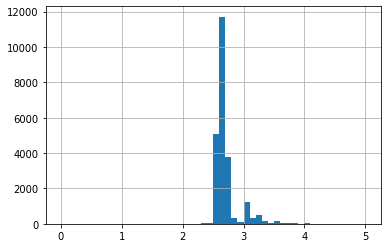

In [77]:
data['ceiling_height'].hist(bins = 50, range = (0, 5))

Мы уже анализировали потолки и находили 100 метровые. А тут еще метровые. 

In [78]:
data.query('ceiling_height > 4 or ceiling_height < 2')['ceiling_height'].describe()

count     78.000000
mean      12.110897
std       14.078688
min        1.000000
25%        4.200000
50%        4.750000
75%       24.750000
max      100.000000
Name: ceiling_height, dtype: float64

In [79]:
print("Количество квартир с потолками менее 2 и более 4 метра:", data.query('ceiling_height > 4 or ceiling_height < 2')['rooms'].count())
print("Доля квартир с 8 и более контами: {:.2%}".format(data.query('ceiling_height > 4 or ceiling_height < 2')['rooms'].count()/data.shape[0]))

Количество квартир с потолками менее 2 и более 4 метра: 78
Доля квартир с 8 и более контами: 0.33%


В данных всего 78 квартир с потолками ниже 2 или выше 4. Удалим эти данные из выборки. 

In [80]:
# уберем квартиры с 8 и более комнатами, с потолками более 4м и меньше 2м и плодащью более 200 метров
data_new = data.query('ceiling_height < 4')
data_new = data_new.query('ceiling_height > 2')
data_new = data_new.query('rooms < 8')
data_new = data_new.query('total_area <= 200')

# посмотрим, как изменилась стоимость за кв метр и общая стоимость квартиры

data_new['per_m_th'].describe()

count    23359.000000
mean        98.295610
std         45.200547
min          0.111835
25%         76.500000
50%         94.808126
75%        113.786375
max       1736.842105
Name: per_m_th, dtype: float64

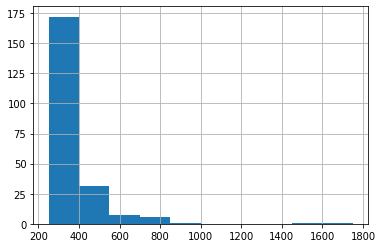

In [81]:
data_new['per_m_th'].hist(range = (250, 1750))

In [82]:
data_new.query('per_m_th > 600')['total_area'].describe()

count     11.000000
mean     112.856364
std       62.406392
min       33.000000
25%       46.710000
50%      124.500000
75%      160.500000
max      190.000000
Name: total_area, dtype: float64

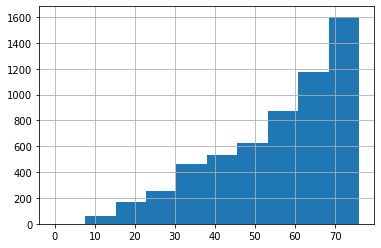

In [83]:
data_new['per_m_th'].hist(range = (0, 76))

In [84]:
data_new.query('per_m_th < 20')['total_area'].describe()

count    168.000000
mean      53.688095
std       20.839584
min       27.600000
25%       42.000000
50%       51.050000
75%       61.100000
max      190.000000
Name: total_area, dtype: float64

In [85]:
print("Количество квартир со стоимостью менее 20 и более 600 т за квм:", data_new.query('per_m_th < 20 or per_m_th > 600')['rooms'].count())
print("Доля квартир со стоимостью менее 20 и более 600 т за квм: {:.2%}".format(data.query('per_m_th < 20 or per_m_th > 600')['rooms'].count()/data.shape[0]))

Количество квартир со стоимостью менее 20 и более 600 т за квм: 179
Доля квартир со стоимостью менее 20 и более 600 т за квм: 0.80%


In [86]:
data_new['last_price_mln'].describe()

count    23359.000000
mean         6.003172
std          6.166579
min          0.012190
25%          3.400000
50%          4.600000
75%          6.680000
max        330.000000
Name: last_price_mln, dtype: float64

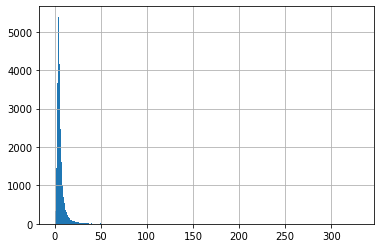

In [87]:
data_new['last_price_mln'].hist(bins = 300)

In [88]:
print("Количество квартир с общей стоимостью 250 млн:", data_new.query('last_price_mln > 250')['rooms'].count())
print("Доля квартир с общей стоимостью 250 млн.: {:.2%}".format(data.query('last_price_mln > 250')['rooms'].count()/data.shape[0]))

Количество квартир с общей стоимостью 250 млн: 2
Доля квартир с общей стоимостью 250 млн.: 0.03%


Среднее и медиана для стоимости за метр и общей стоимости не изменились. Уберем еще квартиры c общей стоимостью более 250 млн и со стоимостью за 1 квм более 600т. и менее 20т. Всего 181 квартиры. 

In [89]:
data_new = data_new.query('last_price_mln < 250')

In [90]:
data_new = data_new.query('per_m_th < 600')
data_new = data_new.query('per_m_th > 20')

In [91]:
# изучим параметр время продажи квартиры
data_new['days_exposition'].describe()

count    20117.000000
mean       179.777352
std        218.601256
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

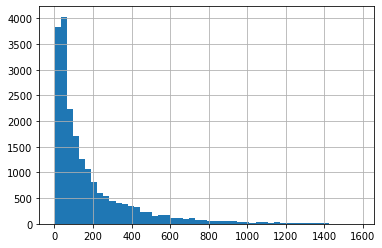

In [92]:
data_new['days_exposition'].hist(bins = 50)

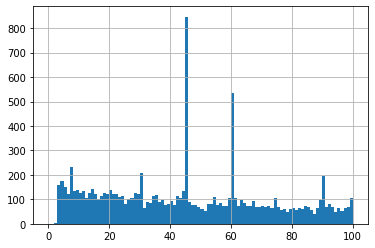

In [93]:
data_new['days_exposition'].hist(bins = 100, range = (0, 100))

Среднее время продажи квартиры составляет 180 дней, а медиана - 95, а стандартное отклонение - 218 дней, что достаточно полозрительно. Есть яркие пики в 8, 30, 45, 60 и 90 дней примерно. Предполагаю, что до первого пика в 40+/- объявления просто снимались, и продажи не происходило - здесь продажи прошли очень быстро. А когда время продажи более 231 год - это уже "забытые квартиры".

Коэффициент корреляции составляет: 0.2498118611749221


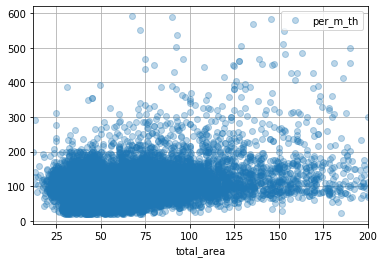

In [94]:
#посчитаем корреляцию между стоимостью квартиры и площадью квартиры
print('Коэффициент корреляции составляет:', data_new['per_m_th'].corr(data['total_area']))
data_new.plot(y ='per_m_th', x = 'total_area', legend = True, style = 'o', alpha = 0.3, grid=True )

Коэффициент корреляции составляет: 0.7419729259493354


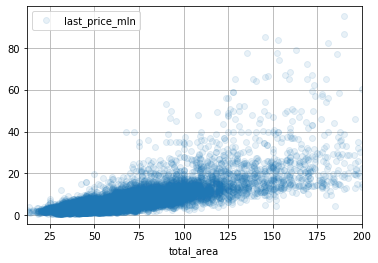

In [95]:
print('Коэффициент корреляции составляет:', data_new['last_price'].corr(data['total_area']))
data_new.plot(y ='last_price_mln', x = 'total_area', legend = True, style = 'o', alpha = 0.1, grid=True )

Онозначно утверждать, что стоимость за квм зависит от площади квартиры нельзя, но можно, что чем больше плодащь квартиры, тем выше ее стоимость.

Коэффициент корреляции составляет: 0.4433584241229753


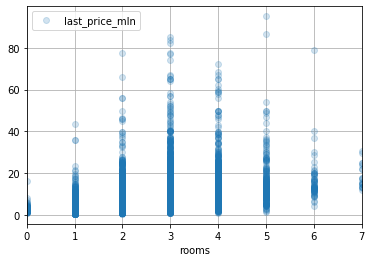

In [96]:
#посчитаем корреляцию между стоимостью квартиры и количеством комнат и посмотрим на график распределения
print('Коэффициент корреляции составляет:', data_new['last_price'].corr(data['rooms']))
data_new.plot(x ='rooms', y = 'last_price_mln', legend = True, style = 'o', alpha = 0.2, grid=True)

Коэффициент корреляции составляет: -0.007851588788791537


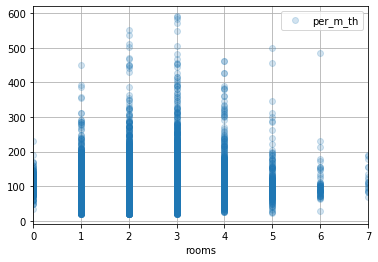

In [97]:
print('Коэффициент корреляции составляет:', data_new['per_m'].corr(data['rooms']))
data_new.plot(x ='rooms', y = 'per_m_th', legend = True, style = 'o', alpha = 0.2, grid=True)

Здесь коэфициент корреляции между стоимость квартиры и кол-вом комнат тоже высокий: при увеличении комнат растет и стоимость. 
Но тем немее можно сказать, что порог стоимости квартиры с 5 и более комнатами такой же как 2х, а с 6 - как у 1. 

Коэффициент корреляции составляет: 0.04946659798652222


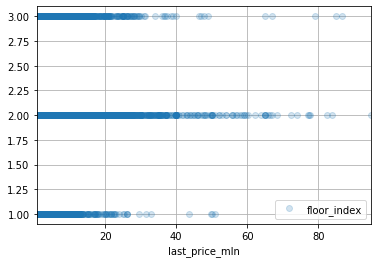

In [98]:
#посчитаем корреляцию между стоимостью квартиры и floor_type и посмотрим на график распределения стоимости и типа этажа
print('Коэффициент корреляции составляет:', data_new['last_price'].corr(data['floor_index']))
data_new.plot(x='last_price_mln', y = 'floor_index', legend = True, style = 'o', alpha = 0.2, grid=True)

Здесь можно однозначо сказать, что квартиры на первом или последнем этаже стоят дешевле других. 

Коэффициент корреляции составляет: -0.3212408120839941


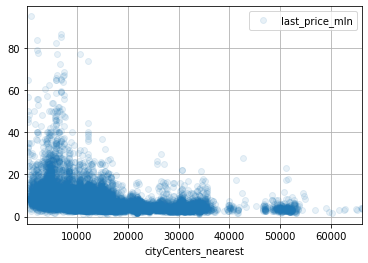

In [99]:
#посчитаем корреляцию между стоимостью квартиры и удальнностью от центра и посмотрим на график распределения
print('Коэффициент корреляции составляет:', data_new['last_price'].corr(data['cityCenters_nearest']))
data_new.plot(y='last_price_mln', x = 'cityCenters_nearest', legend = True, style = 'o', alpha = 0.1, grid=True)

Чем дальше квартира от центра города, тем ниже ее стоимость: коэфициент корреляции отрицательные и составляет -0.3. 
Чем ближе квартира к цетру, тем дороже она стоит.

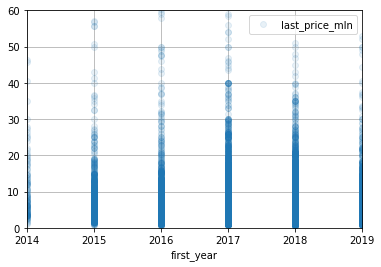

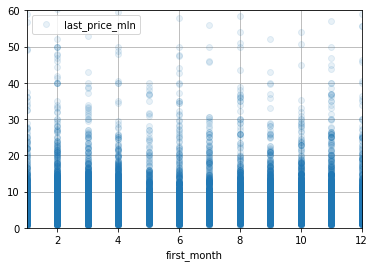

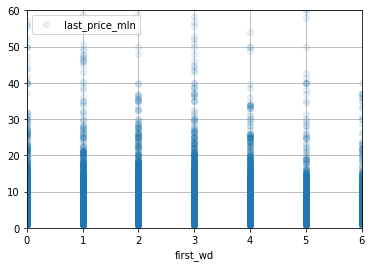

In [100]:
# посмотрим на зависимости стоимость квартиры от дня недели, месяца и года размещения объявления
data_new.plot(y='last_price_mln', x = 'first_year', ylim = (0, 60), legend = True, style = 'o', alpha = 0.1, grid=True)
data_new.plot(y='last_price_mln', x = 'first_month', ylim = (0, 60), legend = True, style = 'o', alpha = 0.1, grid=True)
data_new.plot(y='last_price_mln', x = 'first_wd', ylim = (0, 60), legend = True, style = 'o', alpha = 0.1, grid=True)


In [101]:
print(data_new.groupby('first_year')['last_price_mln'].agg({'count', 'mean', 'median'}))
print()
print(data_new.groupby('first_month')['last_price_mln'].agg({'count', 'mean', 'median'}))
print()
print(data_new.groupby('first_wd')['last_price_mln'].agg({'count', 'mean', 'median'}))

            count  median       mean
first_year                          
2014          134  7.5400  10.959691
2015         1150  5.2445   7.241804
2016         2724  4.5000   6.130937
2017         8015  4.5000   5.879493
2018         8339  4.5750   5.672625
2019         2816  5.0485   6.342255

             count  median      mean
first_month                         
1             1471    4.60  6.030046
2             2587    4.65  6.105668
3             2532    4.65  5.828267
4             2330    4.78  5.924290
5             1249    4.50  6.037332
6             1718    4.40  5.835048
7             1645    4.60  5.999955
8             1710    4.58  6.060810
9             1939    4.69  6.105146
10            2082    4.55  5.804169
11            2321    4.68  6.091129
12            1594    4.68  6.085409

          count  median      mean
first_wd                         
0          3549    4.64  6.033518
1          4103    4.70  5.996387
2          3878    4.69  6.001610
3          418

По субботам и воскресеньям люди не активны, в понедельник просыпаются, а в пятницу уезжают на дачу, а пик приходится на среду. 
По месяцам можно сделать такой же вывод: до и после НГ, месяц май пользователи менее активны, пик же приходится на осенние и весенние месяца. 
А по году продажи ярко виден пик увеличения предложений с 2016 на 2017 год: и квартир стали строить больше, и, видимо, возрасла популярность приложения. А по 2019 году данные не по всему году, поэтому всего 2816 предложений. 
Относительно стоимости квартиры можно сделать вывод, что день недели и месяц не влияют на стоимость квартиры. 
Распределение стоимости по годам: за 2019 год не все данные, поэтому точно сделать вывод нельзя, а в 2014 и 2015 приложение только набирало популярность и публиковались дорогие предложения. 

### Вывод

Стоимость квартиры напрямую зависит от площади: чем выше площадь, тем дороже квартира, тем неменее стоимость за квадратный метр для объектов с 3 и более комнатами уменьшается.
Чем ближе к цетру города, тем выше стоимость. 
На первом этаже квартире дешевле, на последнем дешевле чем на других кроме первого. 

In [102]:
# Выберим 10 населённых пунктов с наибольшим числом объявлений. 
# Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
# Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
# Эти данные можно найти по имени в столбце 'locality_name

popular = data_new['locality_name'].value_counts().head(10)
popular = popular.to_frame().reset_index()
popular.columns = ['city', 'total']
popular

,city,total
0,санкт-петербург,15415
1,поселок мурино,588
2,поселок шушары,440
3,всеволожск,394
4,пушкин,362
5,колпино,337
6,поселок парголово,326
7,гатчина,302
8,деревня кудрово,299
9,выборг,232


In [103]:
def popular_per_m(locality):
    return data_new.loc[data['locality_name'] == locality]['per_m_th'].mean() 

popular['price_per_m'] = popular['city'].apply(popular_per_m) 
print(popular)

                city  total  price_per_m
0    санкт-петербург  15415   112.829690
1     поселок мурино    588    86.064821
2     поселок шушары    440    78.677364
3         всеволожск    394    67.165776
4             пушкин    362   102.769181
5            колпино    337    75.333296
6  поселок парголово    326    90.332263
7            гатчина    302    69.364108
8    деревня кудрово    299    92.473548
9             выборг    232    58.420922


Стоиость квадратного метра напрямую зависит от города, точнее перезжаешь во вторую столицу или ее область. Уровень жизнь в СПБ выше чем в области, соответесвено и средння стоимость за кв.метр выше минимум yf 25%. А самое бюджетный город - Выборг, 233 предложений. 

In [104]:
# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
# Выделите квартиры в Санкт-Петербурге ('locality_name'). 
# Ваша задача — выяснить, какая область входит в центр. 
# Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
# После этого посчитайте среднюю цену для каждого километра. 
# Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
# Определите границу, где график сильно меняется — это и будет центральная зона.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


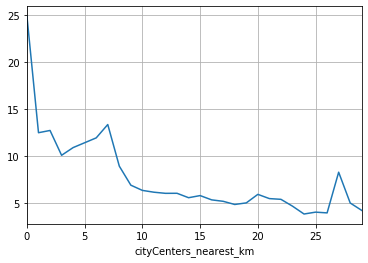

In [105]:
data_spb = data_new.query('locality_name == "санкт-петербург"')
data_spb['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
data_spb_km = data_spb.groupby('cityCenters_nearest_km')['last_price_mln'].mean()
data_spb_km.plot(grid = True, label = 'filtered')


Чем дальше от цетра, тем ниже стоимость квартиры. График четко ломается на стоимость около 3 км - это и есть наша граница. 

In [106]:
# Выделите сегмент квартир в центре. 
# Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
# Также выделите факторы, которые влияют на стоимость квартиры 
# (число комнат, этаж, удалённость от центра, дата размещения объявления). 
# Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [107]:
data_spb_ctr = data_spb.query('cityCenters_nearest_km < 3')

In [108]:
data_spb_ctr['total_area'].describe()

count    464.000000
mean      90.426983
std       36.262571
min       12.000000
25%       64.500000
50%       85.000000
75%      110.000000
max      200.000000
Name: total_area, dtype: float64

In [109]:
data_spb['total_area'].describe()

count    15415.000000
mean        61.526893
std         28.795629
min         12.000000
25%         41.700000
50%         54.400000
75%         73.000000
max        200.000000
Name: total_area, dtype: float64

Средняя площадь квартиры в СПБ - 61,5 квм, а в цетре этот показатель выше - 90 квм. Видимо, раньше жили лучше, а с течением времени жилищные условия ухудшаются, строится все больше малогабаритных квартир: 50% квартир - менее 54 квм. 

In [110]:
data_spb_ctr['rooms'].describe()

count    464.000000
mean       2.984914
std        1.201955
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: rooms, dtype: float64

In [111]:
data_spb['rooms'].describe()

count    15415.000000
mean         2.117029
std          1.031390
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

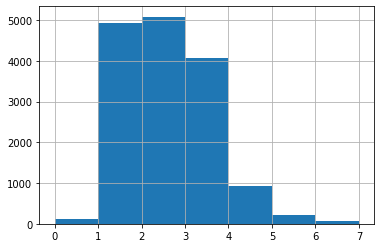

In [112]:
data_spb['rooms'].hist(bins = 7)

По показателю количество комнат можно сделать такой же вывод: в цетре города практически не продается 2х комнатных квартир, это 3 и 4 комнаты, когда в целом по СПБ примерно одинаковое кол-во предложения для 2,3 и 4 комнтаных квартир. 

In [113]:
data_spb_ctr['last_price_mln'].describe()

count    464.000000
mean      13.255977
std       11.108798
min        2.100000
25%        7.600000
50%        9.875000
75%       14.460000
max       95.000000
Name: last_price_mln, dtype: float64

In [114]:
data_spb['last_price_mln'].describe()

count    15415.000000
mean         7.208546
std          5.912316
min          1.190000
25%          4.200000
50%          5.500000
75%          7.950000
max         95.000000
Name: last_price_mln, dtype: float64

Стоимость жилья в цетре города практически в 2 раза выше, чем по всему СПБ. Средняя стоимость квартиры в цетре - 13 млн, а вот по всему СПБ - это всего лишь 7 млн. 

In [115]:
data_spb_ctr['ceiling_height'].describe()

count    464.000000
mean       3.010690
std        0.361537
min        2.500000
25%        2.650000
50%        3.000000
75%        3.270000
max        3.950000
Name: ceiling_height, dtype: float64

In [116]:
data_spb['ceiling_height'].describe()

count    15415.000000
mean         2.711419
std          0.213765
min          2.300000
25%          2.600000
50%          2.650000
75%          2.750000
max          3.980000
Name: ceiling_height, dtype: float64

И потолки выше.

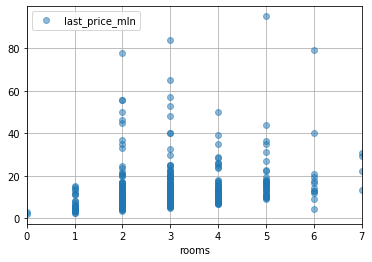

In [117]:
data_spb_ctr.plot(y = 'last_price_mln', x = 'rooms', style = 'o', grid = True, alpha = 0.5)

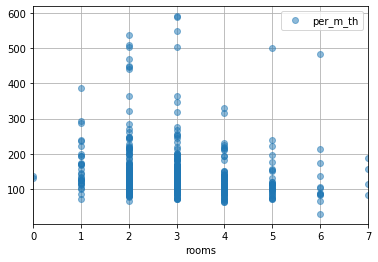

In [118]:
data_spb_ctr.plot(y = 'per_m_th', x = 'rooms', style = 'o', grid = True, alpha = 0.5)

В центре города сохраняется общая тенденция: при увеличении количества комнат, стоимость 1 квм снижается для квартир с 3 и более комнатами.

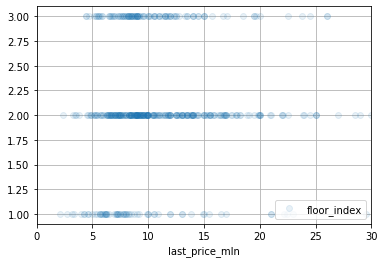

In [119]:
data_spb_ctr.plot(x='last_price_mln', y = 'floor_index', xlim = (0, 30), legend = True, style = 'o', alpha = 0.1, grid=True)

Также сохраняется тенденция относительно этажность: на первом этаже квартиры дешевле, на последнем - дороже.

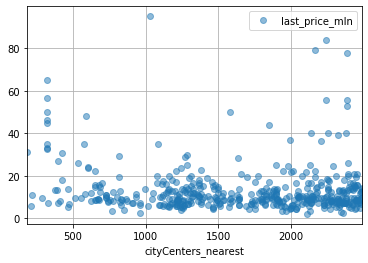

In [120]:
data_spb_ctr.plot(y='last_price_mln', x = 'cityCenters_nearest', legend = True, style = 'o', alpha = 0.5, grid=True)

Очень близко к центру квартир меньше, но нельзя однозначно сказать, что чем ближе, тем дороже: есть как очень блико за 10 млн, так и далеко за 80 млн.

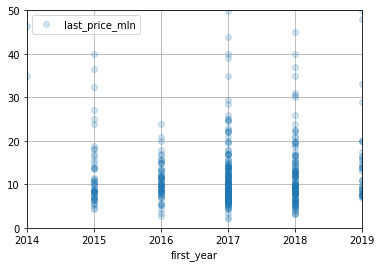

In [121]:
data_spb_ctr.plot(y = 'last_price_mln', x = 'first_year', ylim = (0, 50), style = 'o', grid = True, alpha = 0.2)

In [122]:
data_spb_ctr['first_year'].value_counts()

2017    180
2018    126
2016     61
2015     53
2019     42
2014      2
Name: first_year, dtype: int64

In [123]:
data_spb['first_year'].value_counts()

2017    5413
2018    5307
2019    1964
2016    1821
2015     814
2014      96
Name: first_year, dtype: int64

Самое высокое количество предложений квартир в центре было в 2017 году, до этого кол-во предложение расло, а далее начало снижаться.

             median       mean
first_year                    
2014        10.4935  13.159130
2015         6.0000   8.572093
2016         5.4000   7.391486
2017         5.2500   7.019094
2018         5.4000   6.902576
2019         5.8495   7.531848
                median        mean
first_year                        
2014        131.235862  140.945278
2015        101.582314  113.948246
2016        100.574713  110.628018
2017        101.420455  109.241203
2018        106.285130  113.319269
2019        113.458318  121.600529


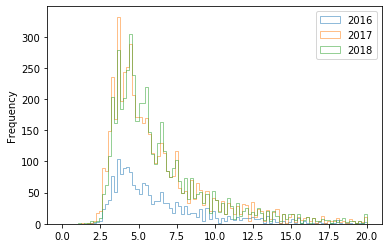

In [124]:
print(data_spb.groupby('first_year')['last_price_mln'].agg({'mean', 'median'}))
print(data_spb.groupby('first_year')['per_m_th'].agg({'mean', 'median'}))

ax = data_spb.loc[data_spb['first_year'] == 2016].plot(y = 'last_price_mln', kind = 'hist', bins = 100, range = (0, 20), histtype = 'step', label = '2016', linewidth = 0.7, alpha = 0.7)
ax1 = data_spb.loc[data_spb['first_year'] == 2017].plot(y = 'last_price_mln', kind = 'hist', bins = 100,  range = (0, 20), histtype = 'step', label = '2017', ax = ax, linewidth = 0.7, alpha = 0.7)
data_spb.loc[data_spb['first_year'] == 2018].plot(y = 'last_price_mln', kind = 'hist', bins = 100,  range = (0, 20), histtype = 'step', label = '2018', ax = ax1, linewidth = 0.7, alpha = 0.7)


In [125]:
for rooms in range(1, 4):
    print('Для квартир', rooms, 'комнатами')
    print(data_spb.loc[data_spb['rooms'] == rooms].groupby('first_year')['last_price_mln'].agg({'mean', 'median'}))
    print(data_spb.loc[data_spb['rooms'] == rooms].groupby('first_year')['per_m_th'].agg({'mean', 'median'}))
    #ax = data_spb.loc[(data_spb['first_year'] == 2016) & (data_spb['rooms'] == rooms)].plot(y = 'last_price_mln', kind = 'hist', bins = 100, range = (0, 20), histtype = 'step', label = '2016', linewidth = 0.7, alpha = 0.7)
    #ax1 = data_spb.loc[(data_spb['first_year'] == 2017) & (data_spb['rooms'] == rooms)].plot(y = 'last_price_mln', kind = 'hist', bins = 100,  range = (0, 20), histtype = 'step', label = '2017', ax = ax, linewidth = 0.7, alpha = 0.7)
    #data_spb.loc[(data_spb['first_year'] == 2018) & (data_spb['rooms'] == rooms)].plot(y = 'last_price_mln', kind = 'hist', bins = 100,  range = (0, 20), histtype = 'step', label = '2018', ax = ax1, linewidth = 0.7, alpha = 0.7)
   
    print()

Для квартир 1 комнатами
            median      mean
first_year                  
2014         5.450  5.639659
2015         4.200  4.618927
2016         3.999  4.407873
2017         3.950  4.289903
2018         4.100  4.463589
2019         4.400  4.814501
                median        mean
first_year                        
2014        116.161616  125.700344
2015        111.142857  115.851458
2016        109.144543  113.456385
2017        106.020942  110.630927
2018        111.740439  116.465854
2019        120.613885  126.948069

Для квартир 2 комнатами
             median       mean
first_year                    
2014        10.5935  13.291992
2015         5.6500   7.467652
2016         5.2700   6.436678
2017         5.5000   6.469054
2018         5.7500   6.665607
2019         5.9900   6.992420
                median        mean
first_year                        
2014        136.234434  156.093226
2015         99.990000  113.623495
2016         98.761220  107.536404
2017        100.

### Шаг 5. Общий вывод

В 2014 и 2015 годах приложение только набирало популярность, и публиковались достаточно дорогие квартиры. В целом нельзя сказать, что год, месяц или дата влияют на стоимость квартиры. Тем не менее пик публикаций приходится на осенне-весенние месяца.
А вот несленный пункт, количество комнат, площадь, удаленность от центра и этажностью влияют на стоимость квартиры.
Стоимость квартир в СПБ значительно выше, чем в его регионе. 
Но в целом сохраняется общая динамика: при увеличении площади, увеличивается стоимость квартиры, но при количестве комнат 4 и более, стоимость за квадраный метр уменьшается, и общая стоимость квартиры увеличивается не так резко. 
Квартиры на последнем этаже дешевле, на первом этаже дешевле, чем на последнем, и чем дальше квартира от цетра, тем ниже ее стоимость.